#### 1. Import pandas library

In [1]:
import pandas as pd

#### 2. Import BigQuery library


In [2]:
from google.cloud import bigquery


#### 3. Create a connection to BigQuery

In [3]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/Jordi/git/IronHack/Ironhack Data Analytics.json"
client = bigquery.Client()

#### 4. Import data from the users table from the stackoverflow public database for United Kingdom only

In [8]:

QUERY = '''
    SELECT 
        * 
    FROM 
        `bigquery-public-data.stackoverflow.users` u
    WHERE 
        LOWER(location) LIKE '%england%' 
    OR 
        LOWER(location) LIKE '%uk%' 
    OR
        LOWER(location) LIKE '%united kingdom%'
    '''

query_job = client.query(QUERY)
df_users=query_job.to_dataframe()
df_users.head()


,id,display_name,about_me,age,creation_date,last_access_date,location,reputation,up_votes,down_votes,views,profile_image_url,website_url
0,636878,Jono Alderson,<p>Digital strategist. Marketing technologist....,,2011-02-27 22:01:29.423000+00:00,2018-04-05 07:50:53.980000+00:00,"York, United Kingdom",313,6,2,25,https://graph.facebook.com/513913755/picture?t...,http://www.jonoalderson.com
1,2758772,Aghdas,,,2013-09-08 11:21:11.683000+00:00,2019-05-22 13:21:57.337000+00:00,"London, UK",46,12,0,61,https://i.stack.imgur.com/62QkV.jpg?s=128&g=1,
2,6678549,kashveyron,,,2016-08-04 14:22:33.787000+00:00,2019-05-16 12:59:26.460000+00:00,"England, United Kingdom",68,87,0,29,https://www.gravatar.com/avatar/827f51c9a7535c...,
3,945029,Carl,,,2011-09-14 16:03:14.723000+00:00,2019-05-31 15:51:23.630000+00:00,UK,2549,752,0,63,,
4,642861,musaul,<p>London based software consultant specialisi...,,2011-03-03 11:10:53.077000+00:00,2019-05-12 16:24:49.837000+00:00,"London, United Kingdom",2266,69,3,309,,http://musaul.net/


#### 5. Rename id column to user_id

In [9]:
print(df.shape)
df_users = df_users.rename(columns={'id':'user_id'})
df_users.head(2)

(11520907, 6)


,user_id,display_name,about_me,age,creation_date,last_access_date,location,reputation,up_votes,down_votes,views,profile_image_url,website_url
0,636878,Jono Alderson,<p>Digital strategist. Marketing technologist....,,2011-02-27 22:01:29.423000+00:00,2018-04-05 07:50:53.980000+00:00,"York, United Kingdom",313,6,2,25,https://graph.facebook.com/513913755/picture?t...,http://www.jonoalderson.com
1,2758772,Aghdas,,,2013-09-08 11:21:11.683000+00:00,2019-05-22 13:21:57.337000+00:00,"London, UK",46,12,0,61,https://i.stack.imgur.com/62QkV.jpg?s=128&g=1,


#### 6. Import from the stackoverflow_posts table all items which have up to 20 view counts and only select 'id', 'owner_user_id', 'score', 'view_count', 'comment_count', 'favorite_count'

In [10]:
QUERY = '''
    SELECT 
        id,
        owner_user_id,
        score,
        view_count,
        comment_count,
        favorite_count
    FROM 
        `bigquery-public-data.stackoverflow.stackoverflow_posts`
    WHERE 
        view_count > 20
    '''

query_job = client.query(QUERY)
df_posts=query_job.to_dataframe()
df_posts.head()

,id,owner_user_id,score,view_count,comment_count,favorite_count
0,11279055,456789.0,18,2069,16,5.0
1,20313969,2564682.0,0,230,12,NaN
2,22000437,1366800.0,1,152,14,NaN
3,36612138,5193995.0,1,83,21,NaN
4,30962010,4934464.0,1,46,12,NaN


#### 7. Rename id column to post_id and owner_user_id to user_id

In [11]:
df_posts = df_posts.rename(columns={'id':'post_id','owner_user_id':'user_id'})
df_posts.head()

,post_id,user_id,score,view_count,comment_count,favorite_count
0,11279055,456789.0,18,2069,16,5.0
1,20313969,2564682.0,0,230,12,NaN
2,22000437,1366800.0,1,152,14,NaN
3,36612138,5193995.0,1,83,21,NaN
4,30962010,4934464.0,1,46,12,NaN


#### 8. Define new dataframes for users and posts with the following selected columns:
    **users columns**: user_id, reputation,views,up_votes,down_votes
    **posts columns**: post_id, score,user_id,view_count,comment_count

In [15]:
users = df_users[['user_id', 'reputation','views','up_votes','down_votes']]
posts = df_posts[['post_id', 'score','user_id','view_count','comment_count']]
print('users=',users.shape)
print('posts=',posts.shape)
users.head()

users= (134183, 5)
posts= (11520907, 5)


,user_id,reputation,views,up_votes,down_votes
0,636878,313,25,6,2
1,2758772,46,61,12,0
2,6678549,68,29,87,0
3,945029,2549,63,752,0
4,642861,2266,309,69,3


#### 8. Merge both dataframes, users and posts. 
You will need to make a [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) of posts and users dataframes.

In [17]:
merged_df = pd.merge(users,posts, on='user_id') 
print('users=',merged_df.shape)
merged_df.head()

users= (427045, 9)


,user_id,reputation,views,up_votes,down_votes,post_id,score,view_count,comment_count
0,636878,313,25,6,2,7377847,1,883,2
1,636878,313,25,6,2,13997725,0,954,0
2,636878,313,25,6,2,12992401,2,2635,0
3,636878,313,25,6,2,30827099,0,205,1
4,636878,313,25,6,2,7289492,0,414,1


#### 9. How many missing values do you have in your merged dataframe? 

In [20]:
print('missing values =',posts.shape[0] - merged_df.shape[0])


missing values = 11093862


#### Bonus: Identify extreme values in your merged dataframe, create a dataframe called outliers with the same columns as our data set and calculate the bounds. The values of the outliers dataframe will be the values of the merged_df that fall outside that bounds. You will need to save your outliers dataframe to a csv file on your-code folder. Hint: post_id cannot have outliers!

In [29]:
stats = merged_df[['reputation','views','up_votes','down_votes','score','view_count','comment_count']].describe().T
stats.head()

,count,mean,std,min,25%,50%,75%,max
reputation,427045.0,7600.730904,28721.605069,1.0,438.0,1669.0,5548.0,1109230.0
views,427045.0,1067.730696,17704.838610,0.0,75.0,248.0,759.0,1800043.0
up_votes,427045.0,592.154831,1351.833932,0.0,39.0,176.0,610.0,24483.0
down_votes,427045.0,80.556808,658.619516,0.0,0.0,6.0,26.0,63281.0
score,427045.0,2.920470,28.238271,-65.0,0.0,1.0,2.0,7688.0


In [30]:
import warnings
warnings.simplefilter("ignore")

cols = ['reputation','views','up_votes','down_votes','score','view_count','comment_count']

def get_outliers_from_stats(stats, df):
    
    stats['IQR']=stats['75%']-stats['25%']
    outliers = pd.DataFrame(columns=df.columns)
    
    for col in stats.index:
        iqr = stats.at[col,'IQR']
        cutoff = iqr * 1.5
        lower = stats.at[col,'25%'] - cutoff
        upper = stats.at[col,'75%'] + cutoff
        results = df[(df[col] < lower) |
                      (df[col] > upper)].copy()
        results['Outlier'] = col
        outliers = outliers.append(results)
        print('shape outliers = ',outliers.shape)
        return outliers

outliers = get_outliers_from_stats(stats, merged_df)
outliers.head()

shape outliers =  (54295, 10)


,Outlier,comment_count,down_votes,post_id,reputation,score,up_votes,user_id,view_count,views
661,reputation,0,76,11224745,87425,5,11373,214010,373,5535
662,reputation,0,76,10763223,87425,6,11373,214010,548,5535
663,reputation,0,76,13320703,87425,5,11373,214010,107,5535
664,reputation,0,76,4892713,87425,17,11373,214010,2052,5535
665,reputation,0,76,3250725,87425,2,11373,214010,1240,5535


In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

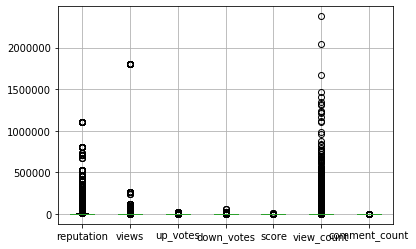

In [40]:
boxplot = merged_df.boxplot(column=['reputation','views','up_votes','down_votes','score','view_count','comment_count'])

Les columnes amb més outliers les trobem a 'reputation', 'view_count' i 'views'